In this excersice we will use logistic regression to classify digits using logistic regression.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [3]:
digits.images[0]  # image data in the form of numericals.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

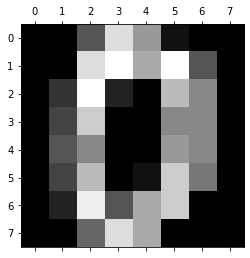

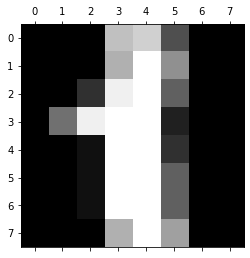

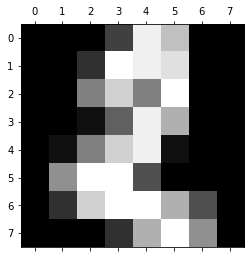

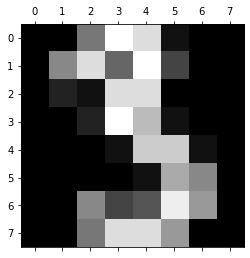

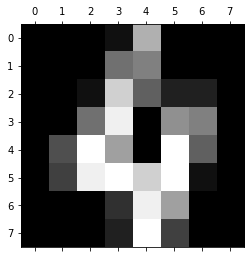

In [4]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [5]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [8]:
print(len(X_train), len(X_test), len(y_train))

1437 360 1437


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

c:\MKM_WORK\PYTHON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.score(X_test, y_test) * 100

97.77777777777777

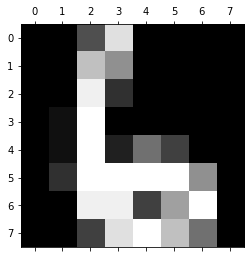

In [13]:
plt.matshow(digits.images[67])

In [14]:
digits.target[67]

6

In [17]:
model.predict([digits.data[67]])

array([6])

In [20]:
model.predict(digits.data[0:5])  

array([0, 1, 2, 3, 4])

In [21]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 38,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 35]], dtype=int64)

Text(69.0, 0.5, 'Truth')

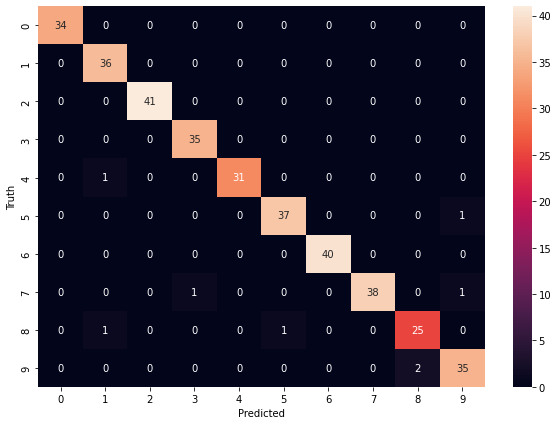

In [23]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')